In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# 1. Warm up - identity matrix
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [51]:
# 2. Linear regression with one variable

In [52]:
# 2.1 Plotting the Data

In [53]:
x,y = np.loadtxt('./ex1data1.txt', delimiter=',', unpack=True)

In [54]:
print('x length: {}'.format(len(x)))
print('y length: {}'.format(len(y)))

x length: 97
y length: 97


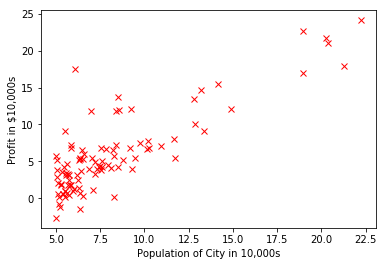

In [55]:
plt.plot(x, y, 'rx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [56]:
# 2.2 Gradient Descent

In [57]:
m = len(x)
iterations = 1500
alpha = 0.01
theta = np.zeros((2, 1))

X_1 = x.reshape(-1,1)
X_0 = np.ones((m, 1))
X = np.concatenate((X_0, X_1), axis=1)

y = y.reshape(-1, 1)
# print(X.shape)
# print(theta.shape)
# print(y.shape)

In [58]:
def compute_cost(X, y, theta):
    m = len(X)
    temp = np.dot(X, theta) - y
    return np.sum(temp.T.dot(temp)) / (2*m)

In [59]:
print(compute_cost(X, y, theta))

32.07273387745567


In [60]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * X.T.dot(X.dot(theta) - y)
        J_history[i] = compute_cost(X, y, theta)
        
    return theta, J_history

In [61]:
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

In [62]:
print(theta)

[[-3.63029144]
 [ 1.16636235]]


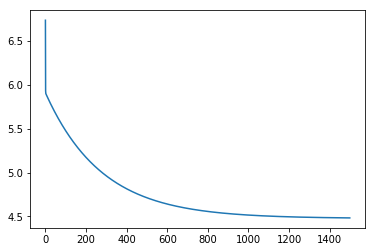

In [63]:
plt.plot(J_history)
plt.show()

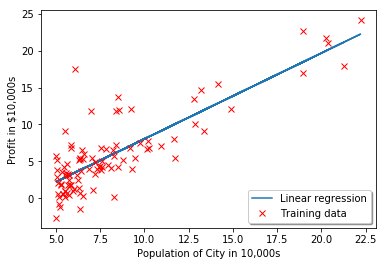

In [64]:
plt.plot(x, np.dot(X, theta), '-', label='Linear regression')
plt.plot(x, y, 'rx', label='Training data')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc='lower right', shadow=True, fontsize='medium')

plt.show()

In [65]:
# 3. Linear regression with multiple variables

In [66]:
# 3.1 Feature normalization

In [67]:
data = np.loadtxt('./ex1data2.txt', delimiter=',')
x = data[:,[0,1]]
y = data[:, 2].reshape(-1, 1)

In [68]:
# print(x.shape)
# print(y.shape)

In [69]:
x_means = np.mean(x, axis=0)
x_stds = np.std(x, axis=0)
# print(x_means.shape)
# print(x_stds)

In [70]:
X = np.array([(x[j][i] - x_means[i]) / x_stds[i] for j in range(len(x)) for i in range(len(x_means))])
X = X.reshape(len(x), len(x_means))
# j comes first so that keeping the order unchanged.
X_0 = np.ones((len(x), 1))
X = np.hstack((X_0, X))
#print(X)

In [71]:
# x_a = (x - np.mean(X)) / np.std(x)
# print(x_a)

In [72]:
# 3.2 Gradient descent

In [73]:
iterations = 400
alpha = 0.01
num_features = len(x_means)
m = len(x)
theta = np.zeros(num_features + 1).reshape(num_features + 1, 1)

# print(X)

In [74]:
def compute_cost_multi(X, y, theta):
    temp = np.dot(X, theta) - y
    # return np.sum(np.power(temp, 2)) / (2 * m)
    return np.sum(temp.T.dot(temp)) / (2*m)

In [75]:
print(compute_cost_multi(X, y, theta))

65591548106.45744


In [76]:
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    
        J_history[i] = compute_cost_multi(X, y, theta)
    
    return theta, J_history

In [77]:
theta, J_history = gradient_descent_multi(X, y, theta, alpha, iterations)

In [78]:
print(theta)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


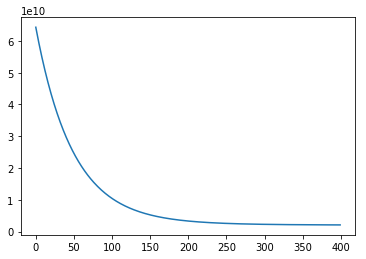

In [79]:
plt.plot(J_history)